In [53]:
%pip install pandas numpy matplotlib plotly seaborn nbformat scipy statsmodels scikit-learn


  Using cached statsmodels-0.14.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.2 kB)
  Using cached scikit_learn-1.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 31.1 MB/s eta 0:00:0000:0100:01
Using cached statsmodels-0.14.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
Using cached scikit_learn-1.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [statsmodels] [statsmodels]]
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px 
import seaborn as sns
from plotly.offline import iplot , plot 
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset1 = pd.read_csv("./data_source/ds_salaries.csv")
dataset2 = pd.read_csv("./data_source/jobs_in_data.csv")

print("Dataset 1 shape:")
print(f"Number of Row : {dataset1.shape[0]}\nNumber of Columns : {dataset1.shape[1]}")
print("Dataset 1 info:")
print(dataset1.info())

print("Dataset 2 shape:")
print(f"Number of Row : {dataset2.shape[0]}\nNumber of Columns : {dataset2.shape[1]}")
print("Dataset 2 info:")
print(dataset2.info())

Dataset 1 shape:
Number of Row : 607
Number of Columns : 12
Dataset 1 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
None
Dataset 2 shape:
Number of Row : 9355
Number of Columns : 12
Dataset 2 info:
<class 'pandas

### Se lee los datasets y se obtiene informacion de los datos necesaris

In [4]:
# Check NaN Value
print("Checking for NaN values in Dataset 1:")
dataset1.isna().sum()

Checking for NaN values in Dataset 1:


Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [5]:
print("Checking for NaN values in Dataset 2:")
dataset2.isna().sum()

Checking for NaN values in Dataset 2:


work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [6]:
# Describe Numerical Columns
print("Describing numerical columns in Dataset 1:")
dataset1.describe().iloc[:,:2]


Describing numerical columns in Dataset 1:


,Unnamed: 0,work_year
count,607.000000,607.000000
mean,303.000000,2021.405272
std,175.370085,0.692133
min,0.000000,2020.000000
25%,151.500000,2021.000000
50%,303.000000,2022.000000
75%,454.500000,2022.000000
max,606.000000,2022.000000


In [7]:
# Describe Numerical Columns
print("Describing numerical columns in Dataset 2:")
dataset2.describe().iloc[:,:2]

Describing numerical columns in Dataset 2:


,work_year,salary
count,9355.000000,9355.000000
mean,2022.760449,149927.981293
std,0.519470,63608.835387
min,2020.000000,14000.000000
25%,2023.000000,105200.000000
50%,2023.000000,143860.000000
75%,2023.000000,187000.000000
max,2023.000000,450000.000000


In [8]:
# Describe all Data
print("Describing all data in Dataset 1:")
dataset1.describe(exclude=np.number)

Describing all data in Dataset 1:


,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


In [9]:
# Describe all Data
print("Describing all data in Dataset 2:")
dataset2.describe(exclude=np.number)

Describing all data in Dataset 2:


,job_title,job_category,salary_currency,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
count,9355,9355,9355,9355,9355,9355,9355,9355,9355
unique,125,10,11,83,4,4,3,70,3
top,Data Engineer,Data Science and Research,USD,United States,Senior,Full-time,In-person,United States,M
freq,2195,3014,8591,8086,6709,9310,5730,8132,8448


In [10]:
print("Dataset 1 Data Cardinality and Null Values:")
pd.DataFrame({'Count':dataset1.shape[0],
              'Null':dataset1.isnull().sum(),
              'Null %':dataset1.isnull().mean() * 100,
              'Cardinality':dataset1.nunique()
})

Dataset 1 Data Cardinality and Null Values:


,Count,Null,Null %,Cardinality
Unnamed: 0,607,0,0.0,607
work_year,607,0,0.0,3
experience_level,607,0,0.0,4
employment_type,607,0,0.0,4
job_title,607,0,0.0,50
salary,607,0,0.0,272
salary_currency,607,0,0.0,17
salary_in_usd,607,0,0.0,369
employee_residence,607,0,0.0,57
remote_ratio,607,0,0.0,3


In [11]:
print("Dataset 2 Data Cardinality and Null Values:")
pd.DataFrame({'Count':dataset2.shape[0],
              'Null':dataset2.isnull().sum(),
              'Null %':dataset2.isnull().mean() * 100,
              'Cardinality':dataset2.nunique()
})

Dataset 2 Data Cardinality and Null Values:


,Count,Null,Null %,Cardinality
work_year,9355,0,0.0,4
job_title,9355,0,0.0,125
job_category,9355,0,0.0,10
salary_currency,9355,0,0.0,11
salary,9355,0,0.0,1507
salary_in_usd,9355,0,0.0,1786
employee_residence,9355,0,0.0,83
experience_level,9355,0,0.0,4
employment_type,9355,0,0.0,4
work_setting,9355,0,0.0,3


### Limpiar datasets y obtener informacion de nuevo

In [12]:
dataset1.drop(['Unnamed: 0'], axis=1, inplace=True)
dataset2.drop(['job_category'], axis=1, inplace=True)

# Delete Duplicates
dataset1.drop_duplicates(inplace=True)
dataset2.drop_duplicates(inplace=True)
# Check Duplicates
print("Checking for duplicates in Dataset 1:")
print(f"Number of Duplicates: {dataset1.duplicated().sum()}")
print("Checking for duplicates in Dataset 2:")
print(f"Number of Duplicates: {dataset2.duplicated().sum()}")

Checking for duplicates in Dataset 1:
Number of Duplicates: 0
Checking for duplicates in Dataset 2:
Number of Duplicates: 0


In [13]:
# Rows and Columns after removing duplicates
print("Dataset 1 shape after removing duplicates:")
print(f"Number of Row : {dataset1.shape[0]}\nNumber of Columns : {dataset1.shape[1]}")
print("Dataset 2 shape after removing duplicates:")
print(f"Number of Row : {dataset2.shape[0]}\nNumber of Columns : {dataset2.shape[1]}")

Dataset 1 shape after removing duplicates:
Number of Row : 565
Number of Columns : 11
Dataset 2 shape after removing duplicates:
Number of Row : 5341
Number of Columns : 11


In [14]:
# Dataset info
print("Dataset 1 info after cleaning:")
print(dataset1.info())
print("Dataset 2 info after cleaning:")
print(dataset2.info())

Dataset 1 info after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    int64 
 1   experience_level    565 non-null    object
 2   employment_type     565 non-null    object
 3   job_title           565 non-null    object
 4   salary              565 non-null    int64 
 5   salary_currency     565 non-null    object
 6   salary_in_usd       565 non-null    int64 
 7   employee_residence  565 non-null    object
 8   remote_ratio        565 non-null    int64 
 9   company_location    565 non-null    object
 10  company_size        565 non-null    object
dtypes: int64(4), object(7)
memory usage: 53.0+ KB
None
Dataset 2 info after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 5341 entries, 0 to 9354
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ---

In [15]:
# Describe all Data
print("Describing all data in Dataset 1:")
dataset1.describe(exclude=np.number)

Describing all data in Dataset 1:


,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,565,565,565,565,565,565,565
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,243,546,130,359,295,318,290


In [16]:
# Describe all Data
print("Describing all data in Dataset 2:")
dataset2.describe(exclude=np.number)

Describing all data in Dataset 2:


,job_title,salary_currency,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
count,5341,5341,5341,5341,5341,5341,5341,5341
unique,125,11,83,4,4,3,70,3
top,Data Engineer,USD,United States,Senior,Full-time,In-person,United States,M
freq,1100,4707,4255,3444,5296,2913,4301,4688


In [17]:
print("Dataset 1 Data Cardinality and Null Values:")
pd.DataFrame({'Count':dataset1.shape[0],
              'Null':dataset1.isnull().sum(),
              'Null %':dataset1.isnull().mean() * 100,
              'Cardinality':dataset1.nunique()
})

Dataset 1 Data Cardinality and Null Values:


,Count,Null,Null %,Cardinality
work_year,565,0,0.0,3
experience_level,565,0,0.0,4
employment_type,565,0,0.0,4
job_title,565,0,0.0,50
salary,565,0,0.0,272
salary_currency,565,0,0.0,17
salary_in_usd,565,0,0.0,369
employee_residence,565,0,0.0,57
remote_ratio,565,0,0.0,3
company_location,565,0,0.0,50


In [18]:
print("Dataset 2 Data Cardinality and Null Values:")
pd.DataFrame({'Count':dataset2.shape[0],
              'Null':dataset2.isnull().sum(),
              'Null %':dataset2.isnull().mean() * 100,
              'Cardinality':dataset2.nunique()
})

Dataset 2 Data Cardinality and Null Values:


,Count,Null,Null %,Cardinality
work_year,5341,0,0.0,4
job_title,5341,0,0.0,125
salary_currency,5341,0,0.0,11
salary,5341,0,0.0,1507
salary_in_usd,5341,0,0.0,1786
employee_residence,5341,0,0.0,83
experience_level,5341,0,0.0,4
employment_type,5341,0,0.0,4
work_setting,5341,0,0.0,3
company_location,5341,0,0.0,70


## Numero de empleados por año

In [19]:
# Dataset 1
print(f"Top Year for Number of Employees '{dataset1['work_year'].value_counts().idxmax()}' with value '{dataset1['work_year'].value_counts().max()}'")
print(f"Least Year for Number of Employees '{dataset1['work_year'].value_counts().idxmin()}' with value '{dataset1['work_year'].value_counts().min()}'")

iplot(px.line(x = dataset1['work_year'].value_counts().index,
              y = dataset1['work_year'].value_counts().values,
              markers=True,
              labels={'x':'Year','y':'Number of Employees'},
              title='Years of Work',
              line_shape="linear",
              color_discrete_sequence=['#cc2114'],
              template='plotly_dark'
              ))

Top Year for Number of Employees '2022' with value '278'
Least Year for Number of Employees '2020' with value '72'


In [20]:
# Dataset 2
print(f"Top Year for Number of Employees '{dataset2['work_year'].value_counts().idxmax()}' with value '{dataset2['work_year'].value_counts().max()}'")
print(f"Least Year for Number of Employees '{dataset2['work_year'].value_counts().idxmin()}' with value '{dataset2['work_year'].value_counts().min()}'")

iplot(px.line(x = dataset2['work_year'].value_counts().index,
              y = dataset2['work_year'].value_counts().values,
              markers=True,
              labels={'x':'Year','y':'Number of Employees'},
              title='Years of Work',
              line_shape="linear",
              color_discrete_sequence=['#cc2114'],
              template='plotly_dark'
              ))

Top Year for Number of Employees '2023' with value '3980'
Least Year for Number of Employees '2020' with value '71'


## Job Title 

In [22]:
df_job_title_USD = dataset1.groupby('job_title')['salary_in_usd'].sum()

print(f"Top Year for Number of Employees '{df_job_title_USD.idxmax()}' with Salary '{df_job_title_USD.max()}'")
print(f"Least Year for Number of Employees '{df_job_title_USD.idxmin()}' with Salary '{df_job_title_USD.min()}'")

iplot(px.bar(df_job_title_USD.sort_values(ascending=False)[:10],
             orientation='h',
             labels={'value':'Salary in USD','job_title':'Job Title'},
             title='Job Title with Salaries USD',
             template='plotly_dark',
             color=df_job_title_USD.index[:10],
             text_auto=True
))

Top Year for Number of Employees 'Data Scientist' with Salary '13433726'
Least Year for Number of Employees '3D Computer Vision Researcher' with Salary '5409'


In [23]:
df_job_title_USD = dataset2.groupby('job_title')['salary_in_usd'].sum()

print(f"Top Year for Number of Employees '{df_job_title_USD.idxmax()}' with Salary '{df_job_title_USD.max()}'")
print(f"Least Year for Number of Employees '{df_job_title_USD.idxmin()}' with Salary '{df_job_title_USD.min()}'")

iplot(px.bar(df_job_title_USD.sort_values(ascending=False)[:10],
             orientation='h',
             labels={'value':'Salary in USD','job_title':'Job Title'},
             title='Job Title with Salaries USD',
             template='plotly_dark',
             color=df_job_title_USD.index[:10],
             text_auto=True
))

Top Year for Number of Employees 'Data Engineer' with Salary '157928139'
Least Year for Number of Employees 'BI Data Engineer' with Salary '60000'


## Moneda de salario

In [24]:
df_salary_currency = dataset1['salary_currency'].value_counts()
print(f"Most Prefered Currency is '{df_salary_currency.idxmax()}'")
iplot(px.bar(df_salary_currency,
             template='plotly_dark',
             labels={'salary_currency':'Salary Currency','value':'Value'},
             title='Most Prefered Currency',
             text_auto=True,
             color_discrete_sequence=['#cce60e']

             ))

Most Prefered Currency is 'USD'


In [25]:
df_salary_currency = dataset2['salary_currency'].value_counts()
print(f"Most Prefered Currency is '{df_salary_currency.idxmax()}'")
iplot(px.bar(df_salary_currency,
             template='plotly_dark',
             labels={'salary_currency':'Salary Currency','value':'Value'},
             title='Most Prefered Currency',
             text_auto=True,
             color_discrete_sequence=['#cce60e']

             ))

Most Prefered Currency is 'USD'


## Salario promedio por año en USD

In [ ]:
# Dataset 1 
df_salary_in_usd = dataset1.groupby(['work_year','job_title'])['salary_in_usd'].mean()
colors = ['#4a289b', '#a53d3d', '#268e7e', '#e60e0e']
j = 0
for i in range(2020,2023):
    iplot(px.bar(df_salary_in_usd.get(i)[:10],
                 labels={'job_title':'Job Title','value':'Mean of Salary'},
                 title=f"Mean Salary of Jobs for Year in {i}",
                 color_discrete_sequence=[colors[j]],
                 template='plotly_dark',
                 text_auto=True,
                 orientation='h'
                 ))
    j+=1

In [ ]:
# Dataset 2
df_salary_in_usd = dataset2.groupby(['work_year','job_title'])['salary_in_usd'].mean()
colors = ['#4a289b', '#a53d3d', '#268e7e', '#e60e0e']
j = 0
for i in range(2020,2024):
    iplot(px.bar(df_salary_in_usd.get(i)[:10],
                 labels={'job_title':'Job Title','value':'Mean of Salary'},
                 title=f"Mean Salary of Jobs for Year in {i}",
                 color_discrete_sequence=[colors[j]],
                 template='plotly_dark',
                 text_auto=True,
                 orientation='h'
                 ))
    j+=1

## Lugar de residencia de los empleados

In [31]:
# Dataset 1
df_employee_residence = dataset1['employee_residence'].value_counts()


iplot(px.bar(df_employee_residence[:10],
             template='plotly_dark',
             labels={'employee_residence':'Name of Country','value':'Value'},
             title='Top Country in the World in Data Science',
             text_auto=True,
             color_discrete_sequence=['#dd0be0'],
))



In [32]:
# Dataset 2
df_employee_residence = dataset2['employee_residence'].value_counts()


iplot(px.bar(df_employee_residence[:10],
             template='plotly_dark',
             labels={'employee_residence':'Name of Country','value':'Value'},
             title='Top Country in the World in Data Science',
             text_auto=True,
             color_discrete_sequence=['#dd0be0'],
))



## Nivel de experiencia

In [ ]:
df_experience_level = dataset1['experience_level'].value_counts()
print(df_experience_level)

iplot(px.pie(values=df_experience_level.values,
             names=['SE','MI','EN','EX'], 
             title='Experience Level for Data Analysts'
).update_traces(textinfo='percent+label'))


experience_level
SE    243
MI    208
EN     88
EX     26
Name: count, dtype: int64


In [46]:
df_experience_level = dataset2['experience_level'].value_counts()
print(df_experience_level)
iplot(px.pie(values=df_experience_level.values,
             names=['Senior','Mid-level','Entry-level','Executive'],
             title='Experience Level for Data Analysts'
).update_traces(textinfo='percent+label'))


experience_level
Senior         3444
Mid-level      1274
Entry-level     400
Executive       223
Name: count, dtype: int64


## Lugar de trabajo

In [49]:
df_work_setting = dataset1['remote_ratio'].value_counts()
print(df_work_setting)
iplot(px.pie(values=df_work_setting.values,
             names=['100','0','50'],
             title='Type of Work Setting',
).update_traces(textinfo='percent+label'))

remote_ratio
100    346
0      121
50      98
Name: count, dtype: int64


In [50]:
df_work_setting = dataset2['work_setting'].value_counts()
print(df_work_setting)
iplot(px.pie(values=df_work_setting.values,
             names=['In-person','Remote','Hybrid'],
             title='Type of Work Setting',
).update_traces(textinfo='percent+label'))

work_setting
In-person    2913
Remote       2239
Hybrid        189
Name: count, dtype: int64


## Pruebas de hipotesis e inferencia estadistica

Vamos a utilizar el dataset 2 dado que contiene mas datos.

In [54]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### a) Influencia del `company_size` en `salary_in_usd` (ANOVA)

 **Hipótesis:**
 * H₀: El salario medio en USD es el mismo para todos los tamaños de compañía (S, M, L).
 * H₁: Al menos un tamaño de compañía tiene un salario medio en USD diferente.

 Usaremos la prueba ANOVA (Análisis de Varianza) para comparar las medias de tres o más grupos.


Valores únicos en company_size: ['L' 'M' 'S']

Estadístico F: 89.5908
Valor p: 0.0000
Se rechaza la hipótesis nula (H0).
Conclusión: Hay una diferencia estadísticamente significativa en los salarios medios entre los diferentes tamaños de compañía.


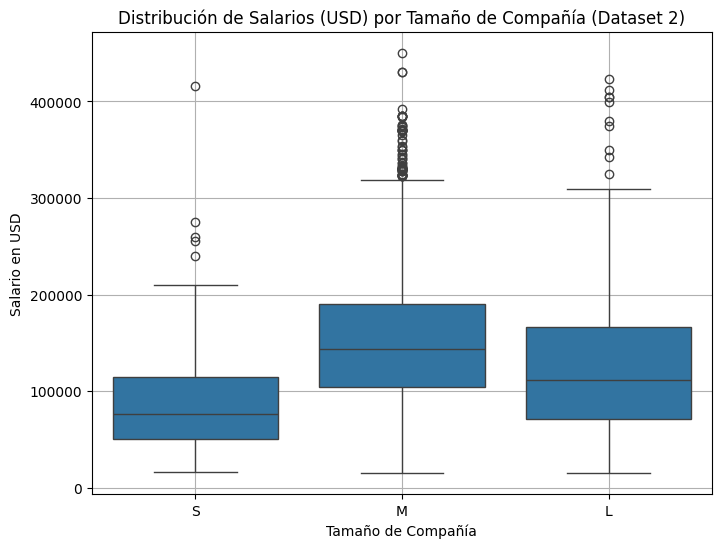

In [55]:
if not dataset2.empty and 'company_size' in dataset2.columns and 'salary_in_usd' in dataset2.columns:
    print("Valores únicos en company_size:", dataset2['company_size'].unique())
    
    # Preparar los datos para ANOVA: listas de salarios para cada tamaño de compañía
    company_size_groups = dataset2.groupby('company_size')['salary_in_usd'].apply(list)
    
    s_salaries = company_size_groups.get('S', [])
    m_salaries = company_size_groups.get('M', [])
    l_salaries = company_size_groups.get('L', [])
    
    # Realizar la prueba ANOVA si hay datos en cada grupo
    if s_salaries and m_salaries and l_salaries:
        f_statistic, p_value = stats.f_oneway(s_salaries, m_salaries, l_salaries)
        
        print(f"\nEstadístico F: {f_statistic:.4f}")
        print(f"Valor p: {p_value:.4f}")
        
        alpha = 0.05
        if p_value < alpha:
            print("Se rechaza la hipótesis nula (H0).")
            print("Conclusión: Hay una diferencia estadísticamente significativa en los salarios medios entre los diferentes tamaños de compañía.")
        else:
            print("No se rechaza la hipótesis nula (H0).")
            print("Conclusión: No hay suficiente evidencia para afirmar una diferencia estadísticamente significativa en los salarios medios entre los diferentes tamaños de compañía.")
        
        # Visualización (Boxplot)
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='company_size', y='salary_in_usd', data=dataset2, order=['S', 'M', 'L'])
        plt.title('Distribución de Salarios (USD) por Tamaño de Compañía (Dataset 2)')
        plt.xlabel('Tamaño de Compañía')
        plt.ylabel('Salario en USD')
        plt.grid(True)
        plt.show()
    else:
        print("No hay suficientes datos en uno o más grupos de tamaño de compañía para realizar ANOVA.")
else:
    print("Dataset 2 está vacío o no contiene las columnas 'company_size' o 'salary_in_usd'.")


### b) Diferencia de salarios entre distintos `job_title` (ANOVA)

Dado que `job_title` tiene alta cardinalidad, seleccionaremos los 5 `job_title` más frecuentes en `dataset2` para la comparación.

**Hipótesis:**
* $H_0$: El salario medio en USD es el mismo para los `job_title` seleccionados.
* $H_1$: Al menos un `job_title` seleccionado tiene un salario medio en USD diferente.

Top 5 job titles seleccionados: ['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Analytics Engineer']

Estadístico F: 106.7183
Valor p: 0.0000
Se rechaza la hipótesis nula (H0).
Conclusión: Hay una diferencia estadísticamente significativa en los salarios medios entre los job titles seleccionados.


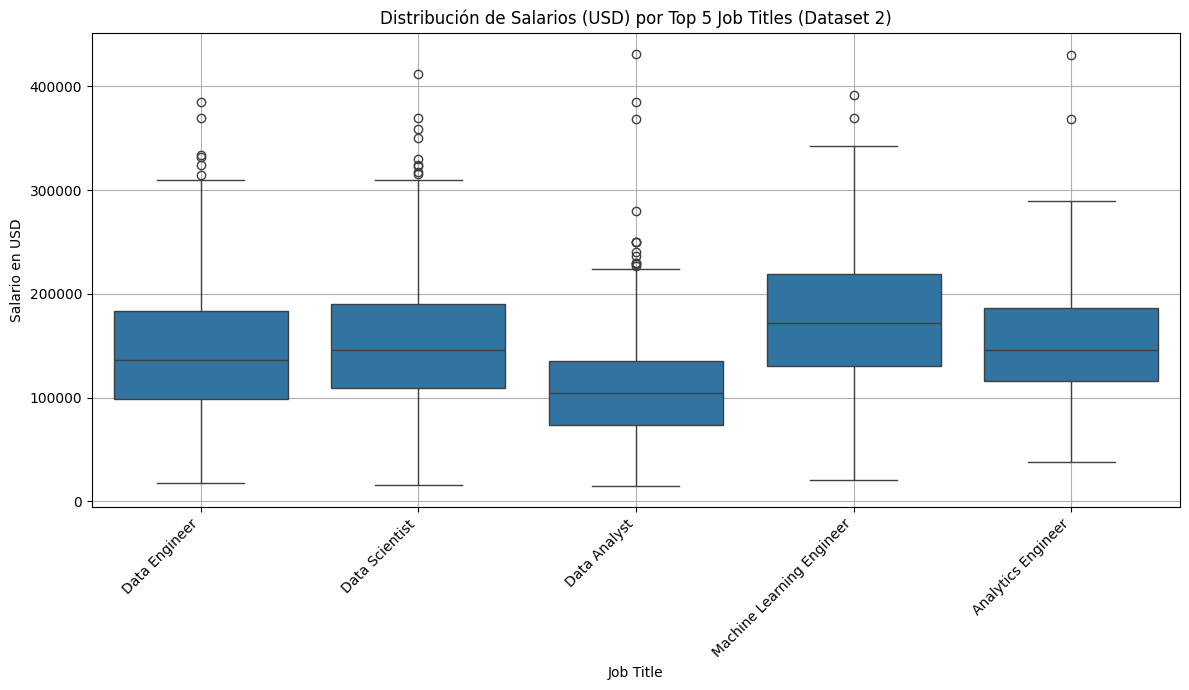

In [56]:
if not dataset2.empty and 'job_title' in dataset2.columns and 'salary_in_usd' in dataset2.columns:
    top_n_jobs = 5
    top_job_titles = dataset2['job_title'].value_counts().nlargest(top_n_jobs).index.tolist()
    print(f"Top {top_n_jobs} job titles seleccionados: {top_job_titles}")
    
    # Filtrar el dataset para incluir solo los job titles seleccionados
    df_top_jobs = dataset2[dataset2['job_title'].isin(top_job_titles)]
    
    # Preparar los datos para ANOVA
    job_title_groups = df_top_jobs.groupby('job_title')['salary_in_usd'].apply(list)
    
    salary_groups_for_anova = [group for group in job_title_groups if len(group) > 1]  # ANOVA requiere al menos 2 observaciones por grupo
    
    if len(salary_groups_for_anova) >= 2:  # ANOVA necesita al menos 2 grupos
        f_statistic_jobs, p_value_jobs = stats.f_oneway(*salary_groups_for_anova)
        
        print(f"\nEstadístico F: {f_statistic_jobs:.4f}")
        print(f"Valor p: {p_value_jobs:.4f}")
        
        alpha = 0.05
        if p_value_jobs < alpha:
            print("Se rechaza la hipótesis nula (H0).")
            print("Conclusión: Hay una diferencia estadísticamente significativa en los salarios medios entre los job titles seleccionados.")
        else:
            print("No se rechaza la hipótesis nula (H0).")
            print("Conclusión: No hay suficiente evidencia para afirmar una diferencia estadísticamente significativa en los salarios medios entre los job titles seleccionados.")
        
        # Visualización (Boxplot)
        plt.figure(figsize=(12, 7))
        sns.boxplot(x='job_title', y='salary_in_usd', data=df_top_jobs, order=top_job_titles)
        plt.title(f'Distribución de Salarios (USD) por Top {top_n_jobs} Job Titles (Dataset 2)')
        plt.xlabel('Job Title')
        plt.ylabel('Salario en USD')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.grid(True)
        plt.show()
    else:
        print("No hay suficientes grupos de job_title con datos adecuados para realizar ANOVA.")
else:
    print("Dataset 2 está vacío o no contiene las columnas 'job_title' o 'salary_in_usd'.")


## 2. Modelado de Regresión

Nos centraremos en `dataset2` para predecir `salary_in_usd`.

### a) Preparación de Datos para Regresión



In [58]:
if not dataset2.empty:
    # Seleccionar características y variable objetivo
    # Consideraremos un subconjunto de características para simplificar inicialmente
    # 'salary' y 'salary_currency' se excluyen ya que 'salary_in_usd' es la variable objetivo estandarizada.
    features = ['work_year', 'experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size', 'work_setting']
    target = 'salary_in_usd'
    
    X = dataset2[features].copy()
    y = dataset2[target].copy()

    if not X.empty:
        # Identificar tipos de columnas para preprocesamiento
        numerical_features = X.select_dtypes(include=np.number).columns.tolist()
        categorical_features = X.select_dtypes(include='object').columns.tolist()
        
        # Definir transformaciones
        # Para variables categóricas de alta cardinalidad como 'job_title', 'employee_residence', 'company_location',
        # es mejor usar una estrategia como agrupar las menos frecuentes o usar Target Encoding.
        # Aquí, para simplificar, usaremos OneHotEncoder con handle_unknown='ignore' y limitaremos job_title.
        
        # Limitar cardinalidad de 'job_title'
        if 'job_title' in X.columns:
            top_10_job_titles = X['job_title'].value_counts().nlargest(10).index
            X['job_title'] = X['job_title'].apply(lambda x: x if x in top_10_job_titles else 'Other')
        
        # Similar para 'employee_residence' y 'company_location' si se usan
        if 'employee_residence' in X.columns:
            top_10_residences = X['employee_residence'].value_counts().nlargest(10).index
            X['employee_residence'] = X['employee_residence'].apply(lambda x: x if x in top_10_residences else 'Other')
        
        if 'company_location' in X.columns:
            top_10_locations = X['company_location'].value_counts().nlargest(10).index
            X['company_location'] = X['company_location'].apply(lambda x: x if x in top_10_locations else 'Other')

        # Actualizar lista de características categóricas después de la transformación
        categorical_features = X.select_dtypes(include='object').columns.tolist()

        # Definir codificadores ordinales para 'experience_level' y 'company_size'
        experience_levels_order = ['Entry-level', 'Mid-level', 'Senior', 'Executive']
        company_size_order = ['S', 'M', 'L']
        
        # Crear el ColumnTransformer
        preprocessor_steps = []
        
        if numerical_features:
            preprocessor_steps.append(('num', StandardScaler(), numerical_features))
        
        # Separar características ordinales de las nominales para OneHotEncoding
        ordinal_features = []
        onehot_features = []

        if 'experience_level' in categorical_features:
            ordinal_features.append('experience_level')
            preprocessor_steps.append(('ord_exp', OrdinalEncoder(categories=[experience_levels_order], handle_unknown='use_encoded_value', unknown_value=-1), ['experience_level']))
        
        if 'company_size' in categorical_features:
            ordinal_features.append('company_size')
            preprocessor_steps.append(('ord_size', OrdinalEncoder(categories=[company_size_order], handle_unknown='use_encoded_value', unknown_value=-1), ['company_size']))
        
        onehot_features = [f for f in categorical_features if f not in ordinal_features]
        if onehot_features:
            preprocessor_steps.append(('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), onehot_features))
        
        if not preprocessor_steps:
            print("No hay transformaciones que aplicar. Verifique las características.")
            # Manejar el caso donde no hay características para preprocesar
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            preprocessor = 'passthrough' # o un transformador vacío
        else:
            preprocessor = ColumnTransformer(transformers=preprocessor_steps, remainder='passthrough')
            # Dividir datos en conjuntos de entrenamiento y prueba
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            # Aplicar preprocesamiento (ajustar en entrenamiento, transformar en ambos)
            # Esto es mejor hacerlo dentro de un Pipeline para evitar data leakage
            print("Dimensiones de X_train antes de preprocesar:", X_train.shape)
            print("Dimensiones de X_test antes de preprocesar:", X_test.shape)
    else:
        print("X está vacío, no se puede continuar con el preprocesamiento y modelado.")
else:
    print("Dataset 2 está vacío. No se puede proceder con el modelado.")
    # Crear DataFrames/Series vacíos para que el notebook no falle en celdas posteriores si se ejecutan todas
    X_train, X_test, y_train, y_test = pd.DataFrame(), pd.DataFrame(), pd.Series(dtype='float64'), pd.Series(dtype='float64')
    preprocessor = None


Dimensiones de X_train antes de preprocesar: (4272, 8)
Dimensiones de X_test antes de preprocesar: (1069, 8)


### b) Modelos de Regresión


In [59]:
models = {}
if not X_train.empty and preprocessor is not None:
    # --- Regresión Lineal ---
    print("\n--- Entrenando Regresión Lineal ---")
    pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('regressor', LinearRegression())])
    try:
        pipeline_lr.fit(X_train, y_train)
        models['Linear Regression'] = pipeline_lr
        print("Regresión Lineal entrenada.")
        
        # (Opcional) Inspeccionar coeficientes si es interpretable
        # Esto es más complejo debido al OneHotEncoding. Se necesitaría obtener los nombres de las características transformadas.
        # feature_names = pipeline_lr.named_steps['preprocessor'].get_feature_names_out()
        # coefficients = pipeline_lr.named_steps['regressor'].coef_
        # print("Coeficientes:", dict(zip(feature_names, coefficients)))
    except Exception as e:
        print(f"Error entrenando Regresión Lineal: {e}")

    # --- Árbol de Decisión Regresor ---
    print("\n--- Entrenando Árbol de Decisión Regresor ---")
    pipeline_dt = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', DecisionTreeRegressor(random_state=42))])
    try:
        pipeline_dt.fit(X_train, y_train)
        models['Decision Tree'] = pipeline_dt
        print("Árbol de Decisión entrenado.")
    except Exception as e:
        print(f"Error entrenando Árbol de Decisión: {e}")

    # --- Random Forest Regresor ---
    print("\n--- Entrenando Random Forest Regresor ---")
    pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', RandomForestRegressor(random_state=42, n_estimators=100))]) # n_estimators es un hiperparámetro importante
    try:
        pipeline_rf.fit(X_train, y_train)
        models['Random Forest'] = pipeline_rf
        print("Random Forest entrenado.")
    except Exception as e:
        print(f"Error entrenando Random Forest: {e}")
else:
    print("X_train está vacío o el preprocesador no está definido. No se pueden entrenar modelos.")



--- Entrenando Regresión Lineal ---
Regresión Lineal entrenada.

--- Entrenando Árbol de Decisión Regresor ---
Árbol de Decisión entrenado.

--- Entrenando Random Forest Regresor ---
Random Forest entrenado.


## 3. Métricas de Evaluación de Modelos de Regresión



--- Evaluando Linear Regression ---
MAE (Error Absoluto Medio): 40308.26
MSE (Error Cuadrático Medio): 2699915403.26
RMSE (Raíz del Error Cuadrático Medio): 51960.71
R² (Coeficiente de Determinación): 0.3610


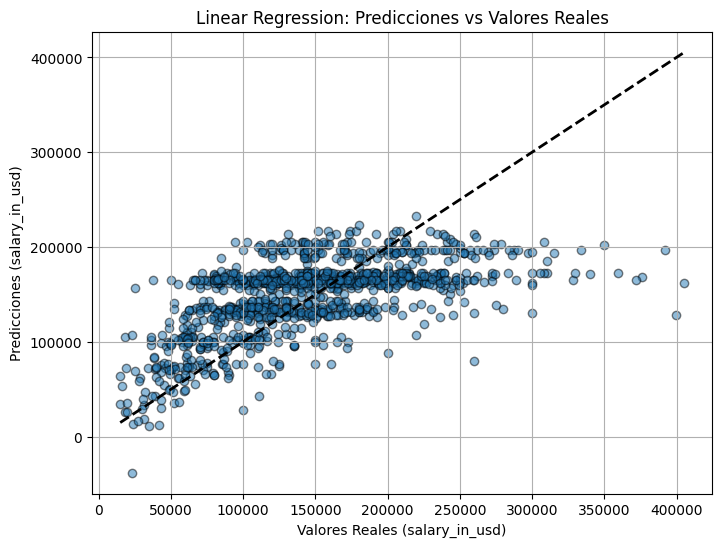


--- Evaluando Decision Tree ---
MAE (Error Absoluto Medio): 42583.74
MSE (Error Cuadrático Medio): 3025181356.36
RMSE (Raíz del Error Cuadrático Medio): 55001.65
R² (Coeficiente de Determinación): 0.2840


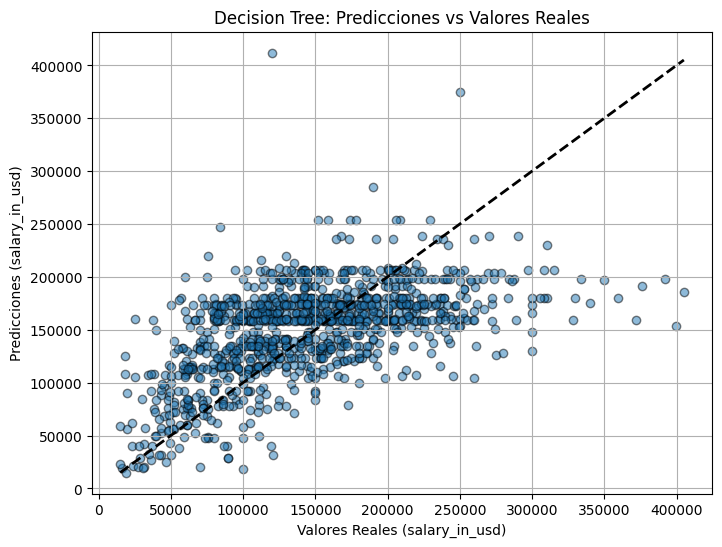


--- Evaluando Random Forest ---
MAE (Error Absoluto Medio): 41384.53
MSE (Error Cuadrático Medio): 2817160088.22
RMSE (Raíz del Error Cuadrático Medio): 53076.93
R² (Coeficiente de Determinación): 0.3332


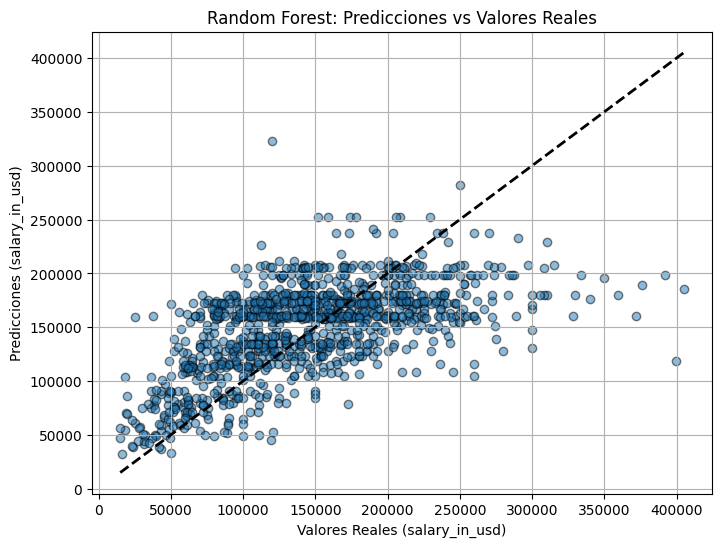


--- Comparación de Modelos ---
                            MAE           MSE          RMSE        R2
Linear Regression  40308.257234  2.699915e+09  51960.710188  0.360963
Random Forest      41384.529030  2.817160e+09  53076.926138  0.333213
Decision Tree      42583.738546  3.025181e+09  55001.648669  0.283977


In [60]:
results = {}
if not X_test.empty and y_test.empty == False:
    for name, model_pipeline in models.items():
        print(f"\n--- Evaluando {name} ---")
        try:
            y_pred = model_pipeline.predict(X_test)
            
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, y_pred)
            
            results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}
            
            print(f"MAE (Error Absoluto Medio): {mae:.2f}")
            print(f"MSE (Error Cuadrático Medio): {mse:.2f}")
            print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
            print(f"R² (Coeficiente de Determinación): {r2:.4f}")
            
            # Gráfico de Predicciones vs Valores Reales
            plt.figure(figsize=(8, 6))
            plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
            plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
            plt.xlabel('Valores Reales (salary_in_usd)')
            plt.ylabel('Predicciones (salary_in_usd)')
            plt.title(f'{name}: Predicciones vs Valores Reales')
            plt.grid(True)
            plt.show()
            
        except Exception as e:
            print(f"Error evaluando {name}: {e}")
            results[name] = {'MAE': np.nan, 'MSE': np.nan, 'RMSE': np.nan, 'R2': np.nan}
            
    # Comparar resultados
    if results:
        results_df = pd.DataFrame(results).T
        print("\n--- Comparación de Modelos ---")
        print(results_df.sort_values(by='RMSE')) # Ordenar por RMSE (menor es mejor)
    else:
        print("No hay resultados de modelos para mostrar.")
else:
    print("X_test o y_test están vacíos. No se puede evaluar modelos.")
